In [2]:
import numpy as np

In [3]:
x=np.array([258, 270, 294, 320, 342, 368, 446, 480, 586])[:,np.newaxis]
y=np.array([236.4, 234.4, 252.8, 298.6, 314.2, 342.2, 360.8, 391.2, 390.8])[:, np.newaxis]

In [4]:
from sklearn.linear_model import LinearRegression, RANSACRegressor

In [5]:
ransac=RANSACRegressor(LinearRegression(), min_samples=4, max_trials=100)

In [6]:
ransac.fit(x,y)

RANSACRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                                n_jobs=None, normalize=False),
                is_data_valid=None, is_model_valid=None, loss='absolute_loss',
                max_skips=inf, max_trials=100, min_samples=4, random_state=None,
                residual_threshold=None, stop_n_inliers=inf,
                stop_probability=0.99, stop_score=inf)

In [7]:
lr=LinearRegression()
lr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
print(mean_squared_error(ransac.predict(x),y))
print(r2_score(ransac.predict(x),y))
print(mean_squared_error(lr.predict(x),y))
print(r2_score(lr.predict(x),y))

493.95631848841276
0.833723072793484
493.95631848841276
0.833723072793484


In [10]:
inlier_mask=ransac.inlier_mask_

In [11]:
inlier_mask

array([ True,  True,  True,  True,  True,  True,  True,  True,  True])

In [12]:
outlier_mask=np.logical_not(inlier_mask)

In [13]:
outlier_mask

array([False, False, False, False, False, False, False, False, False])

In [14]:
import matplotlib.pyplot as plt

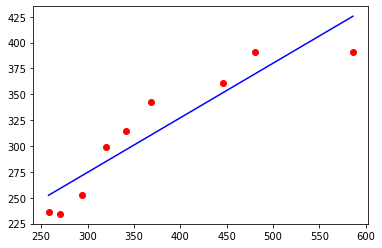

In [15]:
plt.scatter(x[inlier_mask], y[inlier_mask], c='red', marker='o')
plt.scatter(x[outlier_mask], y[outlier_mask], c='green', marker='s')
plt.plot(x, ransac.predict(x), c='blue')
plt.show()

# new 

In [1]:
url='https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'

In [5]:
import pandas as pd
dataset=pd.read_csv(url, header=None, na_values='?', skipinitialspace=True, sep='\s+')
dataset

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger


In [3]:
target=dataset[[0]]
data=dataset[[4]]

In [4]:
target.shape

(398, 1)

In [20]:
data.shape

(398, 1)

In [21]:
pd.DataFrame(data).describe()

,4
count,398.000000
mean,2970.424623
std,846.841774
min,1613.000000
25%,2223.750000
50%,2803.500000
75%,3608.000000
max,5140.000000


In [44]:
from sklearn.linear_model import LinearRegression, RANSACRegressor
ransac1=RANSACRegressor(LinearRegression(), min_samples=50)

In [45]:
ransac1.fit(data, target)

RANSACRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                                n_jobs=None, normalize=False),
                is_data_valid=None, is_model_valid=None, loss='absolute_loss',
                max_skips=inf, max_trials=100, min_samples=50,
                random_state=None, residual_threshold=None, stop_n_inliers=inf,
                stop_probability=0.99, stop_score=inf)

In [24]:
inlier_mask1=ransac1.inlier_mask_

In [25]:
outlier_mask1=np.logical_not(inlier_mask1)

In [26]:
a=np.arange(1610, 5150)[:,np.newaxis]

In [27]:
a.shape

(3540, 1)

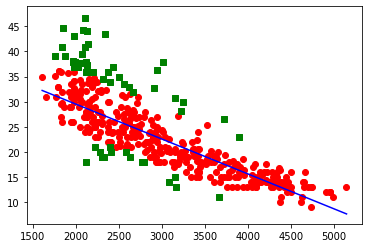

In [28]:
plt.scatter(data[inlier_mask1], target[inlier_mask1], c='red', marker='o')
plt.scatter(data[outlier_mask1], target[outlier_mask1], marker='s', c='green')
plt.plot(a, ransac1.predict(a), c='blue')
plt.show()

In [29]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet

In [30]:
lasso=Lasso()
ridge=Ridge()
enet=ElasticNet()

In [31]:
lasso.fit(data, target)
ridge.fit(data, target)
enet.fit(data, target)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [32]:
print(mean_squared_error(lasso.predict(data), target))
print(r2_score(lasso.predict(data), target))

18.780941132566742
0.5543185118952179


In [33]:
print(mean_squared_error(ridge.predict(data), target))
print(r2_score(ridge.predict(data), target))

18.780939734628394
0.554480847556848


In [34]:
print(mean_squared_error(enet.predict(data), target))
print(r2_score(enet.predict(data), target))

18.780940089498795
0.5543990776207632


In [35]:
lr.fit(data, target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
print(mean_squared_error(lr.predict(data), target))
print(r2_score(lr.predict(data), target))

18.780939734628397
0.554480850686538


In [37]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(data, target)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [38]:
print(mean_squared_error(dt.predict(data), target))
print(r2_score(dt.predict(data), target))

2.2505548576214403
0.9616506226123485


In [39]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=10)
rfr.fit(data, target)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [40]:
print(mean_squared_error(rfr.predict(data), target))
print(r2_score(rfr.predict(data), target))

5.905210135947951
0.8891721852768306


In [41]:
from sklearn.svm import SVR

In [42]:
svr=SVR()
svr.fit(data, target)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [43]:
print(mean_squared_error(svr.predict(data), target))
print(r2_score(svr.predict(data), target))

45.77705823424721
-22.568343991778058
